In [1]:
import pandas as pd

In [2]:
# file path
global_data = '../output_file/mmr_global.csv'
causes_data = '../output_file/causes_of_deaths_final.csv'

In [3]:
# create df
global_df = pd.read_csv(global_data)
causes_df = pd.read_csv(causes_data)

### Global MMR

In [4]:
global_df.head()

,name,id,mmr,ranking,category,latitude,longitude
0,Belarus,BY,2,1,Very Low (<100),53.7440,27.9470
1,Italy,IT,2,1,Very Low (<100),45.3889,10.7776
2,Norway,NO,2,1,Very Low (<100),60.5366,7.4496
3,Poland,PL,2,1,Very Low (<100),52.1484,19.3110
4,Czech Republic,CZ,3,5,Very Low (<100),49.8360,15.5465


In [6]:
top_10_mmr = global_df.sort_values('mmr', ascending=False).head(10)

top_10_mmr

,name,id,mmr,ranking,category,latitude,longitude
184,South Sudan,SS,1150,185,Extremely High (>1000),7.2928,30.1985
183,Chad,TD,1140,184,Extremely High (>1000),17.1223,19.3602
182,Sierra Leone,SL,1120,183,Extremely High (>1000),8.5306,-11.7953
181,Nigeria,NG,917,182,Very High (500-999),9.6551,8.1061
180,Somalia,SO,829,180,Very High (500-999),2.7589,42.8847
179,Central African Republic,CF,829,180,Very High (500-999),7.2596,21.6691
178,Mauritania,MR,766,179,Very High (500-999),19.1695,-9.4755
177,Guinea-Bissau,GW,667,178,Very High (500-999),12.0227,-15.1106
176,Liberia,LR,661,177,Very High (500-999),6.7929,-9.9769
175,Afghanistan,AF,638,176,Very High (500-999),34.4754,66.8303


In [8]:
bottom_10_mmr = global_df.sort_values('mmr', ascending=True).head(10)

bottom_10_mmr

,name,id,mmr,ranking,category,latitude,longitude
0,Belarus,BY,2,1,Very Low (<100),53.7440,27.9470
1,Italy,IT,2,1,Very Low (<100),45.3889,10.7776
2,Norway,NO,2,1,Very Low (<100),60.5366,7.4496
3,Poland,PL,2,1,Very Low (<100),52.1484,19.3110
4,Czech Republic,CZ,3,5,Very Low (<100),49.8360,15.5465
5,Finland,FI,3,5,Very Low (<100),63.0704,27.7396
6,Greece,GR,3,5,Very Low (<100),38.4414,22.1814
7,Israel,IL,3,5,Very Low (<100),30.6283,34.7087
8,United Arab Emirates,AE,3,5,Very Low (<100),23.3865,54.2485
12,Sweden,SE,4,10,Very Low (<100),58.5810,14.2460


In [7]:
import matplotlib.pyplot as plt

In [24]:
bottom_10_index = bottom_10_mmr.set_index('name').sort_values('mmr', ascending=True)

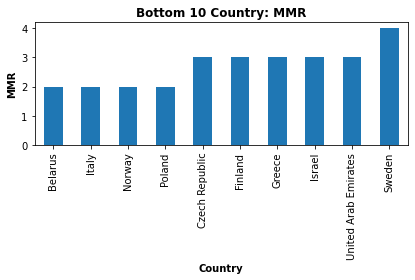

In [25]:
# Generate a bar plot
pd_bar_bottom_10_mmr = bottom_10_index['mmr'].plot(kind='bar', width=0.5)

# Set x/y label, title
pd_bar_bottom_10_mmr.set_title(label='Bottom 10 Country: MMR', fontweight = 'bold')
pd_bar_bottom_10_mmr.set_xlabel('Country', fontweight = 'bold')
pd_bar_bottom_10_mmr.set_ylabel('MMR', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
pd_bar_bottom_10_mmr.figure.savefig('../Resources/globalbottomten.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [28]:
top_10_index = top_10_mmr.set_index('name').sort_values('mmr', ascending=False)

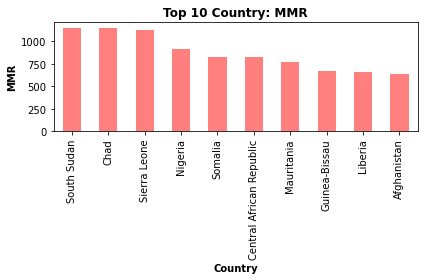

In [29]:
# Generate a bar plot
pd_bar_top_10_mmr = top_10_index['mmr'].plot(kind='bar', color='red', alpha=0.5, width=0.5)

# Set x/y label, title
pd_bar_top_10_mmr.set_title(label='Top 10 Country: MMR', fontweight = 'bold')
pd_bar_top_10_mmr.set_xlabel('Country', fontweight = 'bold')
pd_bar_top_10_mmr.set_ylabel('MMR', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
pd_bar_top_10_mmr.figure.savefig('../Resources/globaltopten.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [30]:
causes_df.head()

,id,region,abortion,embolism,haemorrhage,hypertension,sepsis,other_direct_causes,indirect_causes
0,1,Worldwide,193000,78000,661000,343000,261000,235000,672000
1,2,Developed regions,1100,2000,2400,1900,690,2900,3600
2,3,Developing regions,192000,76000,659000,341000,260000,232000,668000
3,4,Northern Africa,490,720,8300,3800,1300,3800,4000
4,5,Sub-Saharan Africa,125000,27000,321000,209000,134000,119000,375000


In [41]:
# Get overall data
worldwide_df = causes_df.loc[causes_df['region'] == 'Worldwide', ['region', 'abortion', 'embolism', 
                                                                  'hypertension', 'sepsis', 'other_direct_causes',
                                                                 'indirect_causes']]
t_worldwide_df = worldwide_df.transpose()

In [42]:
t_worldwide_df.loc

,0
region,Worldwide
abortion,193000
embolism,78000
hypertension,343000
sepsis,261000
other_direct_causes,235000
indirect_causes,672000


In [39]:
# Generate a pie chart
pd_pie_causes = worldwide_df.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
pd_pie_causes.set_title(label='Causes of Maternal Death', fontweight = 'bold')
pd_pie_causes.set_ylabel('Causes', fontweight = 'bold')


# Save bar graph to Images folder
plt.tight_layout()
pd_pie_causes.figure.savefig('../Resources/causes.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

ValueError: pie requires either y column or 'subplots=True'